## Data Analysis for Age, Activity, Sleep Variables

In [121]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [122]:
Final_Data = pd.read_csv("Datasets/Final_Cleaned")

In [123]:
Final_Data.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


In [124]:
# Recoding Tired During Day Variable
TiredDuringDayDict = {
    0 : "Never",
    1.0 : "Rarely - once a month",
    2.0 : "Sometimes - 2-4 times a month",
    3.0 : "Often- 5-15 times a month",
    4.0 : "Almost always - 16-30 times a month",
    7.0 : "Did not answer/know",
    9.0 : "Did not answer/know"
}
Final_Data["Feeling Tired During Day Frequency"] = Final_Data["Feeling Tired During Day Frequency"].map(TiredDuringDayDict)

#### Variables of Interest 
'Age at Screening' 

'Minutes of Vigorous Recreation Daily',

'Minutes of Moderate Recreation Daily',

'Minutes of Sedentary Activity Daily', 

'Sleep Hours Week/Workdays'

'Sleep Hours Weekends'

'Feeling Tired During Day Frequency' 

Is there a connection between age and sleep hours? Do sleep hours appear to have patterns across the lifespan? 

Is there a connection between age and activity levels? 

### Age and Sleep Variables:

In [125]:
# Creating a new DF with age values being greater than or equal to 16 to match up with sleep variables sample
TiredAge = Final_Data
TiredAge = TiredAge.loc[TiredAge["Age at Screening"]>= 16.0]
TiredAge.head() 

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,Never
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,Sometimes - 2-4 times a month
5,109268.0,1.0,2.0,18.0,3.0,NaN,1.66,540.0,300.0,NaN,NaN,540.0,8.5,8.0,2.0,Rarely - once a month
8,109271.0,3.0,1.0,49.0,3.0,2.0,NaN,NaN,120.0,NaN,NaN,60.0,10.0,13.0,1.0,Often- 5-15 times a month
10,109273.0,3.0,1.0,36.0,3.0,4.0,0.83,240.0,NaN,NaN,120.0,180.0,6.5,8.0,1.0,Sometimes - 2-4 times a month


In [126]:
# Age Binning, creating a column of bins 
agebinned = pd.cut(TiredAge["Age at Screening"],[0, 20, 30, 40, 50, 60, 70, 150],labels=["16-20", "20-30", "30-40","40-50", "50-60",
                                                                                             "60-70", "70+"])
agebinned 

agebinned.value_counts()

TiredAge["Age Bins"] = agebinned
cols = list(TiredAge.columns)


C:\Users\caleb\AppData\Local\Temp\ipykernel_344\3453314279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TiredAge["Age Bins"] = agebinned


### Binning by Age:

In [129]:
countssleep = TiredAge[cols].groupby("Age Bins").count() 
countssleep

C:\Users\caleb\AppData\Local\Temp\ipykernel_344\3198377798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  countssleep = TiredAge[cols].groupby("Age Bins").count()


,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
Age Bins,,,,,,,,,,,,,,,,
16-20,1085,301,1085,1085,1085,122,923,150,278,287,245,583,1082,1083,1085,1085
20-30,1393,397,1393,1393,1393,1393,1189,473,742,623,678,1390,1387,1385,1393,1393
30-40,1423,513,1423,1423,1423,1423,1212,460,706,478,622,1416,1416,1413,1423,1423
40-50,1453,717,1453,1453,1453,1453,1240,388,623,397,617,1452,1439,1437,1453,1453
50-60,1651,1113,1651,1651,1651,1651,1407,410,681,304,650,1648,1630,1631,1651,1651
60-70,1662,1351,1662,1662,1662,1662,1407,337,659,211,614,1659,1644,1644,1662,1662
70+,1528,1414,1528,1528,1528,1528,1278,184,475,117,467,1528,1507,1506,1528,1528


#### Sleep Weekdays vs Age 

In [130]:
cols.pop(-2)
meansleep = TiredAge[cols].groupby("Age Bins").mean() 

C:\Users\caleb\AppData\Local\Temp\ipykernel_344\1705844465.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meansleep = TiredAge[cols].groupby("Age Bins").mean()


#### Sleep Weekdays vs Age 

C:\Users\caleb\AppData\Local\Temp\ipykernel_344\1179536237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TiredAge[cols].groupby("Age Bins").mean()["Sleep Hours Week/Workdays"].plot(kind='bar')


([<matplotlib.axis.YTick at 0x1d9f7241a50>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8')])

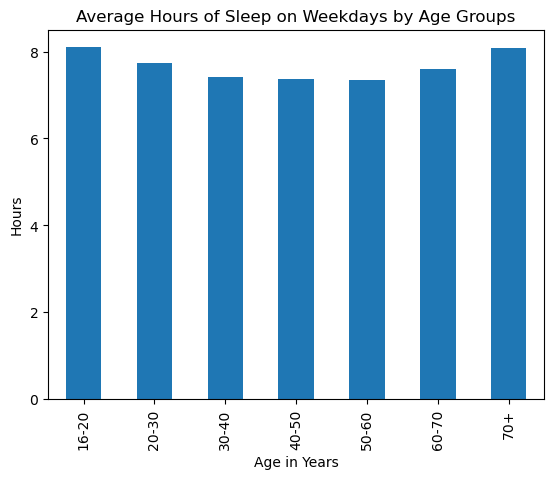

In [132]:
TiredAge[cols].groupby("Age Bins").mean()["Sleep Hours Week/Workdays"].plot(kind='bar')
plt.title("Average Hours of Sleep on Weekdays by Age Groups")
plt.xlabel("Age in Years")
plt.ylabel("Hours")
plt.yticks([0,2,4,6,8])


#### Sleep Weekends vs Age 

C:\Users\caleb\AppData\Local\Temp\ipykernel_344\3971030667.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  TiredAge[cols].groupby("Age Bins").mean()["Sleep Hours Weekends"].plot(kind='bar')


Text(0, 0.5, 'Hours')

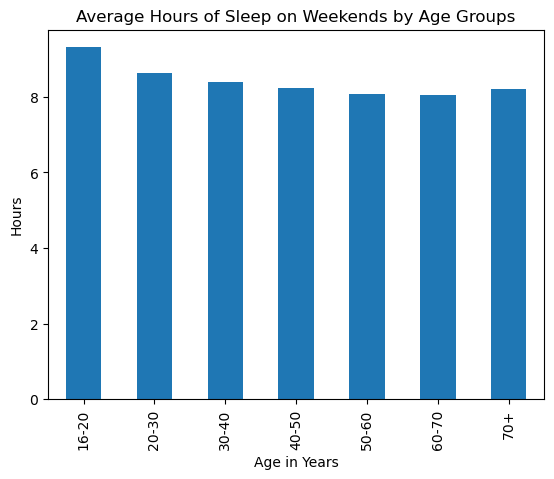

In [104]:
TiredAge[cols].groupby("Age Bins").mean()["Sleep Hours Weekends"].plot(kind='bar')
plt.title("Average Hours of Sleep on Weekends by Age Groups")
plt.xlabel("Age in Years")
plt.ylabel("Hours")

### 

## Recreational activity versus tired during the day

In [ ]:
# Only including those over 18, dropping NA values for the activity columns 
ActivityData = Final_Data.copy()
ActivityData = ActivityData.loc[ActivityData["Age at Screening"]>= 18.0]
ActivityData = ActivityData.dropna(subset=["Minutes of Moderate Recreation Daily","Minutes of Sedentary Activity Daily",
                                           "Minutes of Vigorous Recreation Daily"])


In [ ]:
plt.bar(ActivityData["Feeling Tired During Day Frequency"], height=ActivityData["Minutes of Moderate Recreation Daily"])

In [ ]:
ActivityData.info()
ActivityData = ActivityData.astype({"Minutes of Sedentary Activity Daily": int,
                                    "Minutes of Moderate Recreation Daily": int,
                                    "Minutes of Vigorous Recreation Daily": int
                                    })


In [ ]:
n_bins=30
x = np.random.randn(1000, 3)
colors = ['blue', 'orange', 'green']
plt.hist(x, n_bins, density=1, histtype='bar', stacked=True, label=colors)
plt.legend(loc="upper right")
plt.title('Stacked-histogram ')
plt.show()